In [2]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
data = pd.read_csv(r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测3.0\Data S1_modeling data_withdraw country names.csv")
x = data.drop(columns=['Pollutant'])
y = data['Pollutant']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [96]:
svr = SVR(kernel='rbf'
          , C=1000
          , epsilon=0.2
          , degree=3)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 5373653440.984576
Mean Absolute Error (MAE): 18577.216551423266
R-squared (R2): -0.0071180446978842404


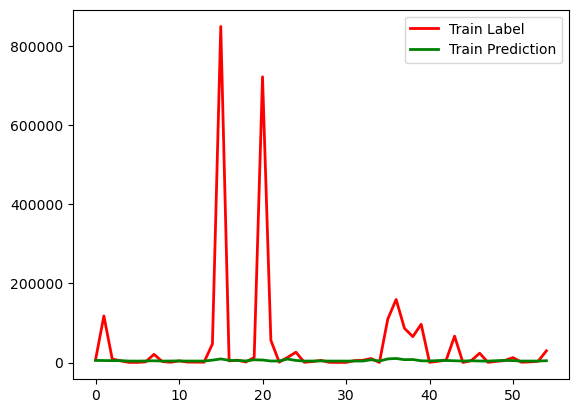

-0.07303403448703594

In [156]:
y_pred_train = svr.predict(x_train)
t = np.arange(len(x_train))

plt.plot(t, y_train, 'r', linewidth = 2, label = 'Train Label')

plt.plot(t, y_pred_train, 'g', linewidth = 2, label = 'Train Prediction')

plt.legend()
plt.show()
svr.score(x_train, y_train)

In [167]:
plot_data = pd.DataFrame({
    'Index': np.arange(len(x_train)),
    'Test Label': y_train.values,
    'Test Prediction': y_pred_train
})

output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "train_data.csv")
plot_data.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"绘图数据已保存至: {output_file}")

绘图数据已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr\train_data.csv


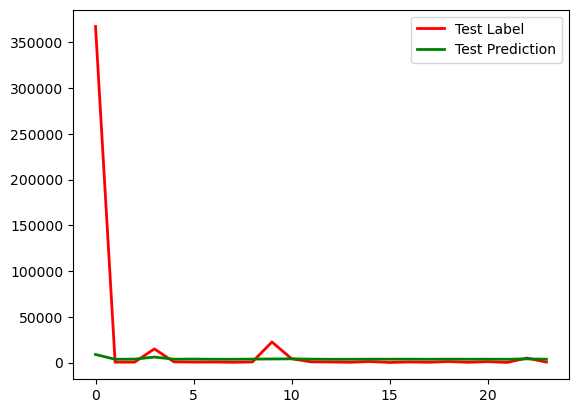

-0.0071180446978842404

In [100]:
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r', linewidth=2, label='Test Label')
plt.plot(t, y_pred, 'g', linewidth=2, label='Test Prediction')
plt.legend()
plt.show()
svr.score(x_test, y_test)

In [108]:
plot_data = pd.DataFrame({
    'Index': np.arange(len(x_test)),
    'Test Label': y_test.values,
    'Test Prediction': y_pred
})

output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\svr"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "test_data.csv")
plot_data.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"绘图数据已保存至: {output_file}")

绘图数据已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\svr\test_data.csv


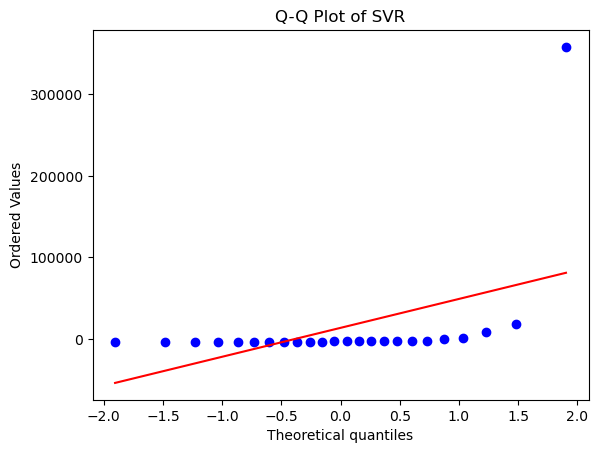

绘图数据已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr\Q-Q_test.csv


In [187]:
import pandas as pd
import scipy.stats as stats

residuals = y_test - y_pred

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of SVR")
plt.show()

(osm, osr), _ = stats.probplot(residuals, dist="norm")
qq_df = pd.DataFrame({'Theoretical Quantiles': osm, 'Ordered Values': osr})

output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_test.csv")

qq_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"绘图数据已保存至: {output_file}")

In [189]:
output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_test_plot.png")

plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of SVR")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()

print(f"Q-Q图已保存至: {output_file}")

Q-Q图已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr\Q-Q_test_plot.png


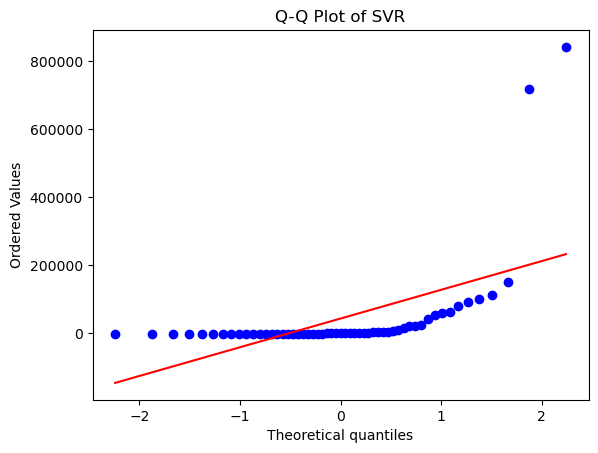

绘图数据已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr\Q-Q_train.csv


In [191]:
import pandas as pd
import scipy.stats as stats

residuals = y_train - y_pred_train

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of SVR")
plt.show()

(osm, osr), _ = stats.probplot(residuals, dist="norm")
qq_df = pd.DataFrame({'Theoretical Quantiles': osm, 'Ordered Values': osr})

output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_train.csv")

qq_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"绘图数据已保存至: {output_file}")

In [193]:
output_path = r"D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "Q-Q_train_plot.png")

plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of SVR")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()

print(f"Q-Q图已保存至: {output_file}")

Q-Q图已保存至: D:\warning\Data\Python_mechine learning\yyy_1\污染物预测4.0\其他模型\svr\Q-Q_train_plot.png
